<a href="https://colab.research.google.com/github/Misha0714/portfolio/blob/main/Handwritten_Letters_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Read the dataset into a dataframe

In [2]:
letter = pd.read_csv('/content/drive/MyDrive/A_Z Handwritten Data.csv')
print(letter.head())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      0    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      0    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      0    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


Separate into feature and set the target variable

In [3]:
X = letter.iloc[:, 1:]
y = letter.iloc[: ,0]
print(y)

0          0
1          0
2          0
3          0
4          0
          ..
372446    25
372447    25
372448    25
372449    25
372450    25
Name: label, Length: 372451, dtype: int64


 Print the shape of feature set and target variable

In [4]:
print(letter.shape)

(372451, 785)




  Make a dictionary

In [5]:
letterDict = {0:'A', 1:'B', 2:'C', 3:'D',4:'E', 5:'F',6:'G', 7:'H',8:'I', 9:'J',10:'K', 11:'L', 12:'M', 13:'N',
              14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21: 'V', 22:'W', 23: 'X', 24:'Y', 25:'Z'}

7. Show a histogram

<ipython-input-6-7d807f68a2e6>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  histogram.set_xticklabels(letterDict.values())


[Text(0, 0, 'A'),
 Text(1, 0, 'B'),
 Text(2, 0, 'C'),
 Text(3, 0, 'D'),
 Text(4, 0, 'E'),
 Text(5, 0, 'F'),
 Text(6, 0, 'G'),
 Text(7, 0, 'H'),
 Text(8, 0, 'I'),
 Text(9, 0, 'J'),
 Text(10, 0, 'K'),
 Text(11, 0, 'L'),
 Text(12, 0, 'M'),
 Text(13, 0, 'N'),
 Text(14, 0, 'O'),
 Text(15, 0, 'P'),
 Text(16, 0, 'Q'),
 Text(17, 0, 'R'),
 Text(18, 0, 'S'),
 Text(19, 0, 'T'),
 Text(20, 0, 'U'),
 Text(21, 0, 'V'),
 Text(22, 0, 'W'),
 Text(23, 0, 'X'),
 Text(24, 0, 'Y'),
 Text(25, 0, 'Z')]

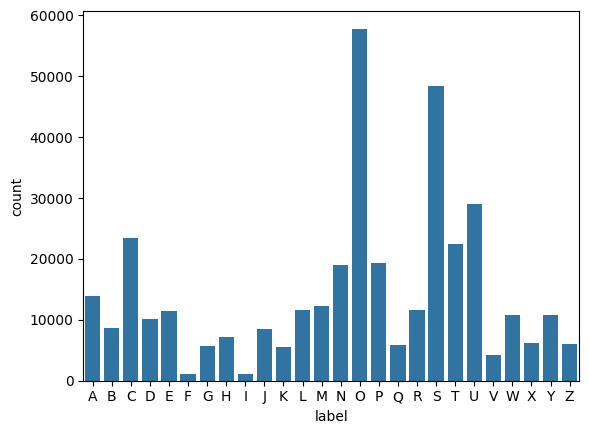

In [6]:
histogram = sb.countplot(x = 'label', data = letter)
histogram.set_xticklabels(letterDict.values())

8. Display 64 random letters from the data set. Display labels. Hint: Plot a pyplot figure. Use plt.subplot to make the 64 subplots. Use a for loop to iterate through each one.

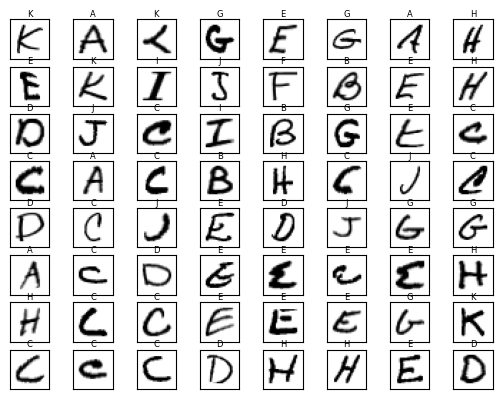

In [13]:
for i in range(1,65):
  index = random.randint(0, 100000)
  image = np.array(X.iloc[index, :]).reshape(28, 28)
  plt.subplot(8, 8, i)
  plt.title(letterDict[y[index]], fontsize=6, pad=2)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image, cmap='binary')

Partition the data into train and test sets (70/30)

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=2023, stratify=y)

 Scale the train and test features

In [15]:
Xtrain = Xtrain/255
Xtest = Xtest/255

 Create an MLPClassifier Experiment with parameters

In [16]:
model = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='relu', max_iter = 10,
                      alpha = 0.001, solver = 'adam', random_state = 2023,
                      learning_rate_init= .01, verbose=True)

 Fit to train model

In [17]:
model.fit(Xtrain, ytrain)

Iteration 1, loss = 0.33689284
Iteration 2, loss = 0.22021802
Iteration 3, loss = 0.20752274
Iteration 4, loss = 0.19941541
Iteration 5, loss = 0.19341414
Iteration 6, loss = 0.19331793
Iteration 7, loss = 0.18694727
Iteration 8, loss = 0.18767501
Iteration 9, loss = 0.18688657
Iteration 10, loss = 0.18310416


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=10, random_state=2023,
              verbose=True)

13. Plot loss curve

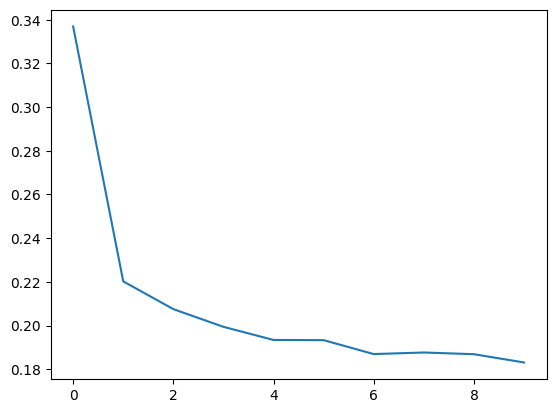

In [18]:
plt.plot(model.loss_curve_)

Display accuracy of model

In [19]:
print("Accuracy on the test partition: ", model.score(Xtest, ytest))

Accuracy on the test partition:  0.963216868332498


Plot confusion matrix along with the letters

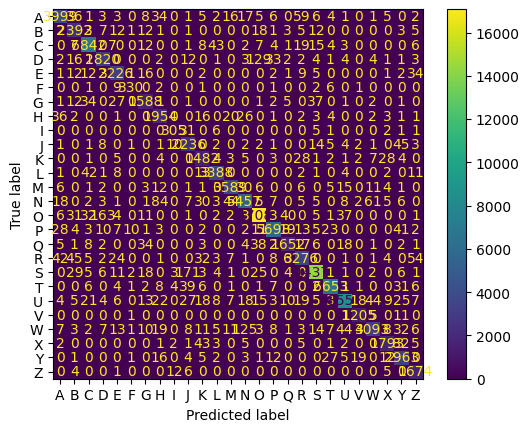

In [20]:
ypred = model.predict(Xtest)
cm = confusion_matrix(ypred, ytest)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=letterDict.values()).plot()

16. Now, display the predicted letter of the first row in the test dataset. Also display the actual letter. Show both actual and predicted letters (as title) on the image of the letter.


Text(0.5, 1.0, 'The predicted letter is J')

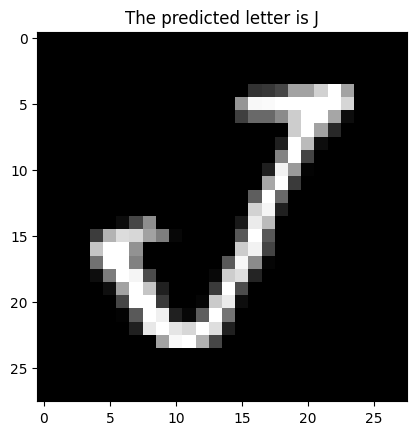

In [21]:
firstLetter = np.array(Xtest.iloc[0]).reshape(28,28)
plt.imshow(firstLetter, cmap='gray')
plt.title('The predicted letter is ' + str(letterDict[ypred[0]]) ) #have to concatenate the strings here (+)

17. Finally, display the actual and predicted letter of a misclassified letter.

Int64Index([67702], dtype='int64')


Text(0.5, 1.0, 'The predicted letter is T The actual letter is F')

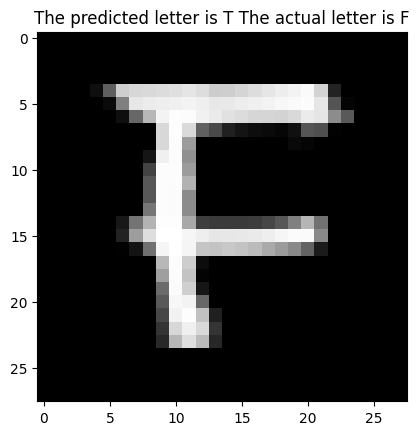

In [22]:
failed_df = Xtest[ypred != ytest]
failed_index = failed_df.sample(n=1).index
print(failed_index)

#get location is the row number not index. At this location what is the index
required_id = ytest.index.get_loc(failed_index[0])

failed_sample = np.array(Xtest.loc[failed_index]).reshape(28,28)
plt.imshow(failed_sample, cmap = 'gray')
plt.title('The predicted letter is ' + letterDict[ypred[failed_index][0]] + ' The actual letter is ' + letterDict[ytest[failed_index].values[0]])